Number of Caucasian subfolders: 25
Number of images for Alexandra Vandernoot_F: 12
Number of images for Adam Arkin_M: 25
Number of images for Daniel Craig_M: 42
Number of images for Ed Sheeran_M: 29
Number of images for Adam McKay_M: 21
Number of images for Dana Loesch_F: 50
Number of images for Bruce Willis_M: 30
Number of images for David Beckham_M: 26
Number of images for Cressida Bonas_F: 24
Number of images for Anabel Alonso_F: 24
Number of images for Ariane Labed_F: 15
Number of images for Tom Berenger_M: 7
Number of images for Kieran Tierney_M: 20
Number of images for Sabrina Ferilli_F: 14
Number of images for Angelina Jolie_F: 35
Number of images for Blake Lively_F: 21
Number of images for Carlo Cracco_M: 27
Number of images for Dean Cain_M: 19
Number of images for Woody Allen_M: 15
Number of images for Carsten Mogensen_M: 5
Number of images for Adam Shaheen_M: 5
Number of images for Adam Gase_M: 14
Number of images for Alex Danson_F: 9
Number of images for Timo Boll_M: 6
Numbe

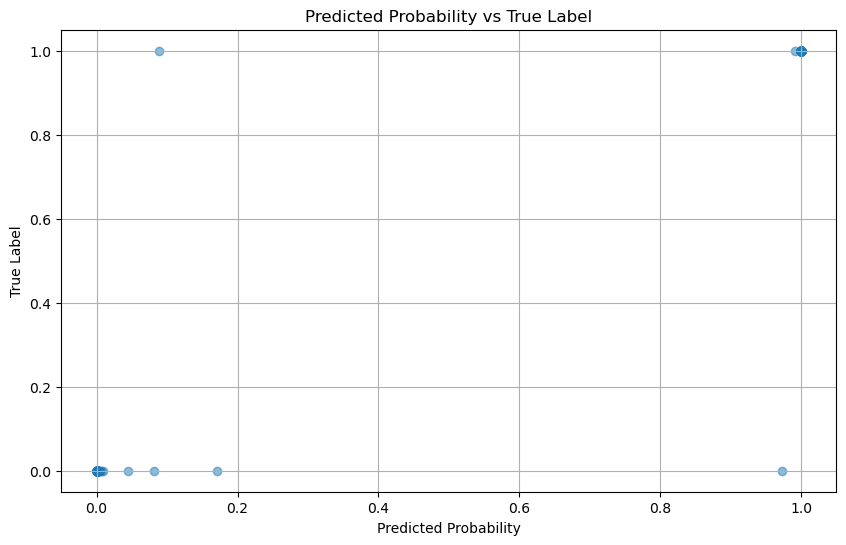

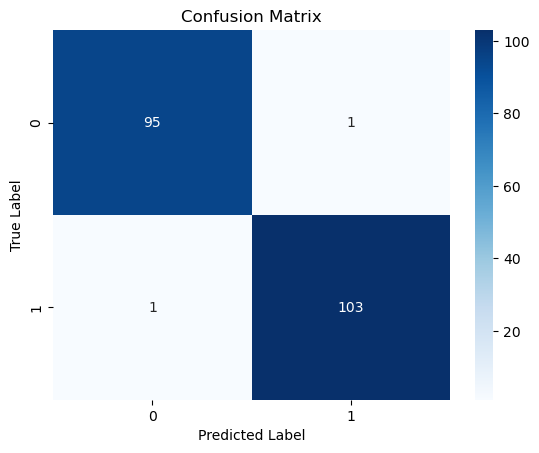

<Figure size 1000x600 with 0 Axes>

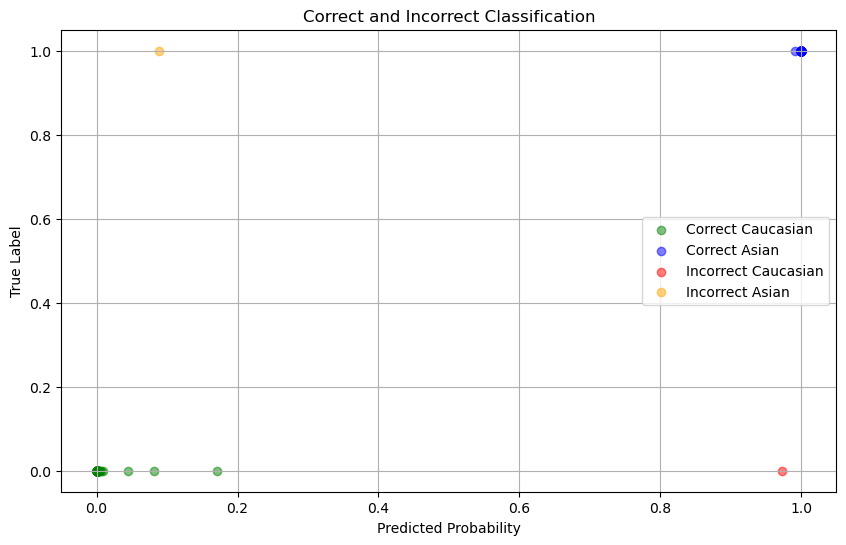

In [30]:
##MESSAGE TO MARKER -- PLEASE MAKE SURE THE PATH TO THE DATASET IS SET CORRECTLY AS THE PATH IS MY OWN FILE PATH##

#CNN model created by myself with balanced dataset
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess data
def preprocess_data(images, labels):
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    # Normalization
    images = images.astype('float32') / 255.0

    return images, labels

# Function to fetch jpg files from subfolders
def fetch_jpgs_from_subfolders(parent_directory, max_images=500):
    jpg_files_dict = {}  # Dictionary to store the result

    # Use glob to search for jpg files recursively
    jpg_files = glob.glob(os.path.join(parent_directory, '**/*.jpg'), recursive=True)
    
    # Randomly select max_images number of files
    random_jpg_files = np.random.choice(jpg_files, size=max_images, replace=False)
    
    # Iterate through the jpg files
    for jpg_file in random_jpg_files:
        folder, filename = os.path.split(jpg_file)
        ethnicity = os.path.basename(os.path.dirname(folder))
        img = cv2.imread(jpg_file)
        if img is not None:
            img = cv2.resize(img, (100, 100))  # Resize image to a fixed size
            if ethnicity not in jpg_files_dict:
                jpg_files_dict[ethnicity] = []
            jpg_files_dict[ethnicity].append(img)

    return jpg_files_dict

# PATH TO CUSTOM DIRECTORY
parent_directory_caucasian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/caucasian'
parent_directory_asian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/asian'

# Fetch JPG files from subfolders for Caucasian dataset
caucasian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_caucasian)

# Check if images are loaded
print("Number of Caucasian subfolders:", len(caucasian_jpg_files_dict))
for ethnicity, images in caucasian_jpg_files_dict.items():
    print(f"Number of images for {ethnicity}:", len(images))

# Fetch JPG files from subfolders for Asian dataset
asian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_asian)

# Check if images are loaded
print("Number of Asian subfolders:", len(asian_jpg_files_dict))
for ethnicity, images in asian_jpg_files_dict.items():
    print(f"Number of images for {ethnicity}:", len(images))

# Load images and labels for Caucasian dataset
X_caucasian = []
y_caucasian = []
for ethnicity, images in caucasian_jpg_files_dict.items():
    for image in images:
        X_caucasian.append(image)
        y_caucasian.append(0)  # 0 represents 'Caucasian'

# Load images and labels for Asian dataset
X_asian = []
y_asian = []
for ethnicity, images in asian_jpg_files_dict.items():
    for image in images:
        X_asian.append(image)
        y_asian.append(1)  # 1 represents 'Asian'

# Convert lists to numpy arrays
X_caucasian = np.array(X_caucasian)
y_caucasian = np.array(y_caucasian)
X_asian = np.array(X_asian)
y_asian = np.array(y_asian)

print("Number of Caucasian images:", len(X_caucasian))
print("Number of Asian images:", len(X_asian))

# Combine Caucasian and Asian datasets with corresponding labels
X = np.concatenate((X_caucasian, X_asian), axis=0)
y = np.concatenate((y_caucasian, y_asian), axis=0)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocess data
X_train, y_train = preprocess_data(X_train, y_train)
X_val, y_val = preprocess_data(X_val, y_val)
X_test, y_test = preprocess_data(X_test, y_test)

# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions on test set
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probs, y_test, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Predicted Probability vs True Label')
plt.grid(True)
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot with ground truth labels and differentiation between correct and incorrect predictions
plt.figure(figsize=(10, 6))

# Plot correctly and incorrectly classified samples
plt.figure(figsize=(10, 6))

# Plot correctly classified samples
correct_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 0)]
correct_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 1)]
plt.scatter(correct_caucasian_probs, np.zeros_like(correct_caucasian_probs), alpha=0.5, color='green', label='Correct Caucasian')
plt.scatter(correct_asian_probs, np.ones_like(correct_asian_probs), alpha=0.5, color='blue', label='Correct Asian')

# Plot incorrectly classified samples
incorrect_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 1)]
incorrect_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 0)]
plt.scatter(incorrect_caucasian_probs, np.zeros_like(incorrect_caucasian_probs), alpha=0.5, color='red', label='Incorrect Caucasian')
plt.scatter(incorrect_asian_probs, np.ones_like(incorrect_asian_probs), alpha=0.5, color='orange', label='Incorrect Asian')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Correct and Incorrect Classification')
plt.legend()
plt.grid(True)
plt.show()



Number of Caucasian subfolders: 25
Number of images for Alex Danson_F: 13
Number of images for Bruce Willis_M: 34
Number of images for Daniel Craig_M: 27
Number of images for Ed Sheeran_M: 32
Number of images for David Beckham_M: 28
Number of images for Anabel Alonso_F: 18
Number of images for Alexandra Vandernoot_F: 14
Number of images for Kieran Tierney_M: 25
Number of images for Dana Loesch_F: 46
Number of images for Woody Allen_M: 14
Number of images for Timo Boll_M: 10
Number of images for Adam McKay_M: 20
Number of images for Blake Lively_F: 26
Number of images for Adam Shaheen_M: 5
Number of images for Adam Arkin_M: 11
Number of images for Angelina Jolie_F: 32
Number of images for Adam Gase_M: 15
Number of images for Carlo Cracco_M: 20
Number of images for Carsten Mogensen_M: 10
Number of images for Cressida Bonas_F: 34
Number of images for Tom Berenger_M: 12
Number of images for Dean Cain_M: 24
Number of images for Aaron Eckhart_M: 3
Number of images for Sabrina Ferilli_F: 10
N

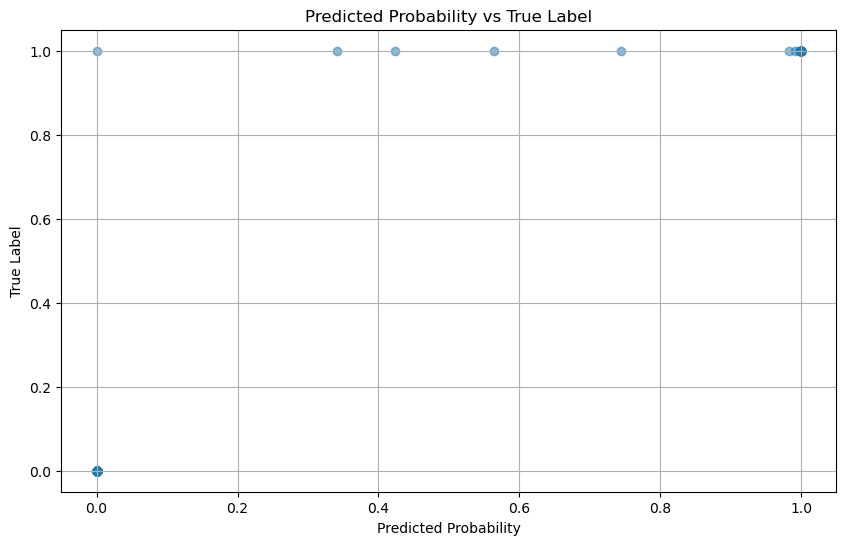

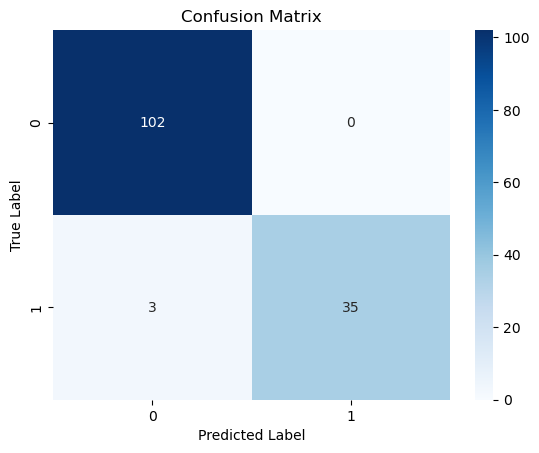

<Figure size 1000x600 with 0 Axes>

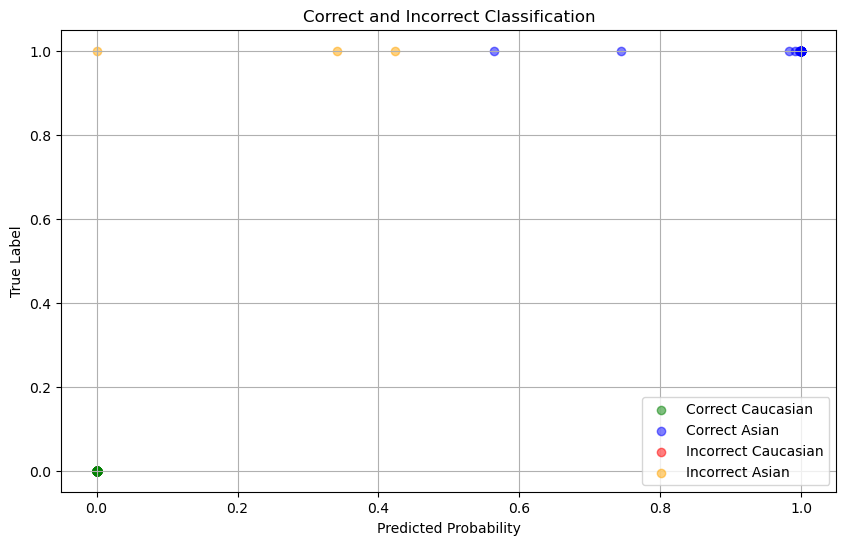

In [31]:
#CNN model created by myself with IMbalanced dataset
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess data
def preprocess_data(images, labels):
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    # Normalization
    images = images.astype('float32') / 255.0

    return images, labels

# Function to fetch jpg files from subfolders
def fetch_jpgs_from_subfolders(parent_directory, max_images=500):
    jpg_files_dict = {}  # Dictionary to store the result

    # Use glob to search for jpg files recursively
    jpg_files = glob.glob(os.path.join(parent_directory, '**/*.jpg'), recursive=True)
    
    # Randomly select max_images number of files
    random_jpg_files = np.random.choice(jpg_files, size=max_images, replace=False)
    
    # Iterate through the jpg files
    for jpg_file in random_jpg_files:
        folder, filename = os.path.split(jpg_file)
        ethnicity = os.path.basename(os.path.dirname(folder))
        img = cv2.imread(jpg_file)
        if img is not None:
            img = cv2.resize(img, (100, 100))  # Resize image to a fixed size
            if ethnicity not in jpg_files_dict:
                jpg_files_dict[ethnicity] = []
            jpg_files_dict[ethnicity].append(img)

    return jpg_files_dict

# CUSTOM PATH usage
parent_directory_caucasian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/caucasian'
parent_directory_asian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/asian'

# Fetch JPG files from subfolders for Caucasian dataset
caucasian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_caucasian)

# Check if images are loaded
print("Number of Caucasian subfolders:", len(caucasian_jpg_files_dict))
for ethnicity, images in caucasian_jpg_files_dict.items():
    print(f"Number of images for {ethnicity}:", len(images))

# Fetch JPG files from subfolders for Asian dataset
asian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_asian)

# Check if images are loaded
print("Number of Asian subfolders:", len(asian_jpg_files_dict))
for ethnicity, images in asian_jpg_files_dict.items():
    print(f"Number of images for {ethnicity}:", len(images))

# Load images and labels for Caucasian dataset
X_caucasian = []
y_caucasian = []
for ethnicity, images in caucasian_jpg_files_dict.items():
    for image in images:
        X_caucasian.append(image)
        y_caucasian.append(0)  # 0 represents 'Caucasian'

# Load images and labels for Asian dataset // this time 100 less images than last time
X_asian = []
y_asian = []
for ethnicity, images in asian_jpg_files_dict.items():
    for image in images:
        if len(X_asian) < len(X_caucasian) - 300:  # Load only as many Asian images as Caucasian images minus 300
            X_asian.append(image)
            y_asian.append(1)  # 1 represents 'Asian'
        else:
            break


# Reshape images to have a consistent shape
X_asian = np.array(X_asian).reshape(-1, 100, 100, 3)

# Convert lists to numpy arrays
X_caucasian = np.array(X_caucasian)
y_caucasian = np.array(y_caucasian)
X_asian = np.array(X_asian)
y_asian = np.array(y_asian)

print("Number of Caucasian images:", len(X_caucasian))
print("Number of Asian images:", len(X_asian))

# Combine Caucasian and Asian datasets with corresponding labels
X = np.concatenate((X_caucasian, X_asian), axis=0)
y = np.concatenate((y_caucasian, y_asian), axis=0)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocess data
X_train, y_train = preprocess_data(X_train, y_train)
X_val, y_val = preprocess_data(X_val, y_val)
X_test, y_test = preprocess_data(X_test, y_test)

# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions on test set
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probs, y_test, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Predicted Probability vs True Label')
plt.grid(True)
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot with ground truth labels and differentiation between correct and incorrect predictions
plt.figure(figsize=(10, 6))

# Plot correctly and incorrectly classified samples
plt.figure(figsize=(10, 6))

# Plot correctly classified samples
correct_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 0)]
correct_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 1)]
plt.scatter(correct_caucasian_probs, np.zeros_like(correct_caucasian_probs), alpha=0.5, color='green', label='Correct Caucasian')
plt.scatter(correct_asian_probs, np.ones_like(correct_asian_probs), alpha=0.5, color='blue', label='Correct Asian')

# Plot incorrectly classified samples
incorrect_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 1)]
incorrect_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 0)]
plt.scatter(incorrect_caucasian_probs, np.zeros_like(incorrect_caucasian_probs), alpha=0.5, color='red', label='Incorrect Caucasian')
plt.scatter(incorrect_asian_probs, np.ones_like(incorrect_asian_probs), alpha=0.5, color='orange', label='Incorrect Asian')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Correct and Incorrect Classification')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
20/20 [==============================] - 135s 7s/step - loss: 0.9263 - accuracy: 0.7922 - val_loss: 0.0479 - val_accuracy: 0.9812
Epoch 2/10
20/20 [==============================] - 134s 7s/step - loss: 0.0478 - accuracy: 0.9812 - val_loss: 0.0828 - val_accuracy: 0.9688
Epoch 3/10
20/20 [==============================] - 145s 7s/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0326 - val_accuracy: 0.9875
Epoch 4/10
20/20 [==============================] - 124s 6s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9875
Epoch 5/10
20/20 [==============================] - 134s 7s/step - loss: 0.0083 - accuracy: 0.9984 - val_loss: 0.0274 - val_accuracy: 0.9937
Epoch 6/10
20/20 [==============================] - 135s 7s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9875
Epoch 7/10
20/20 [==============================] - 123s 6s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9875
Epoch 8/10
20

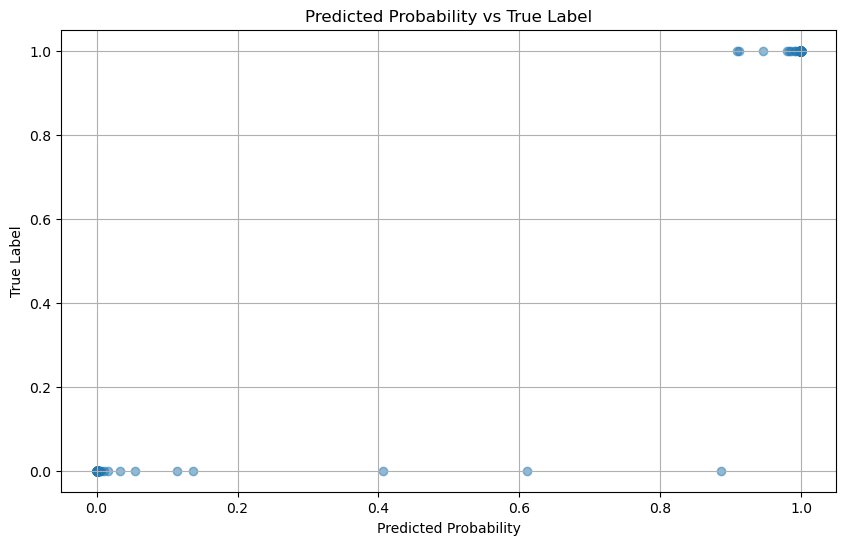

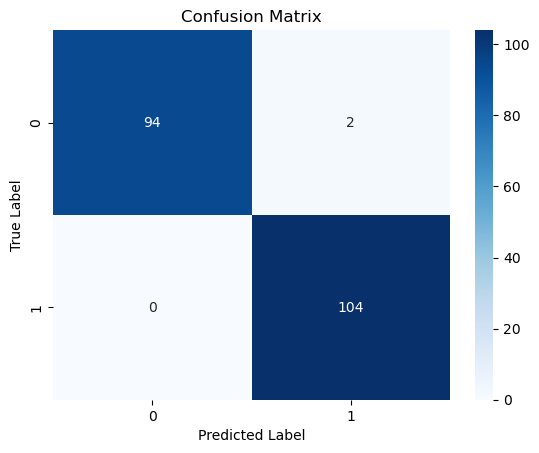

<Figure size 1000x600 with 0 Axes>

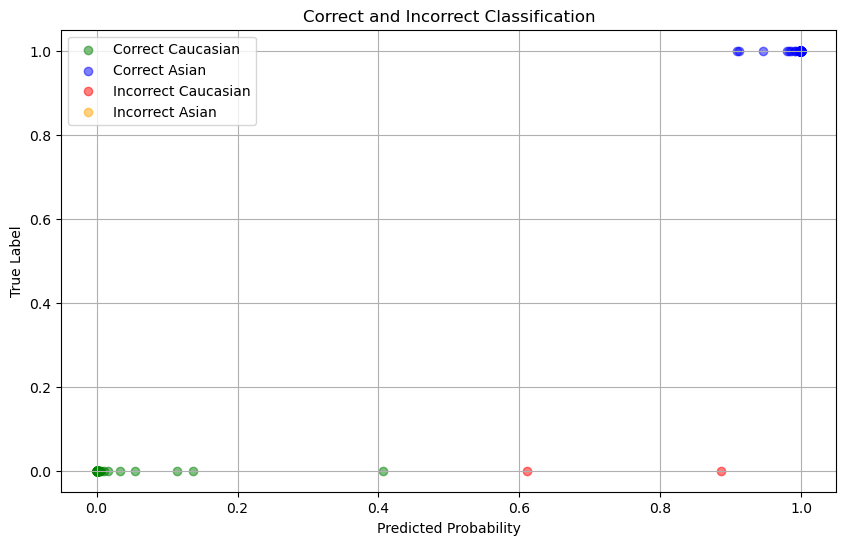

In [32]:
#using pre-trained VGG16 model on balanced dataset
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam as AdamLegacy
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess data
def preprocess_data(images, labels):
    # Normalization
    images = images.astype('float32') / 255.0

    return images, labels

# Function to fetch jpg files from subfolders
def fetch_jpgs_from_subfolders(parent_directory, max_images=500):
    jpg_files_dict = {}  # Dictionary to store the result

    # Use glob to search for jpg files recursively
    jpg_files = glob.glob(os.path.join(parent_directory, '**/*.jpg'), recursive=True)
    
    # Randomly select max_images number of files
    random_jpg_files = np.random.choice(jpg_files, size=max_images, replace=False)
    
    # Iterate through the jpg files
    for jpg_file in random_jpg_files:
        folder, filename = os.path.split(jpg_file)
        ethnicity = os.path.basename(os.path.dirname(folder))
        img = cv2.imread(jpg_file)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize image to the input size of VGG16
            if ethnicity not in jpg_files_dict:
                jpg_files_dict[ethnicity] = []
            jpg_files_dict[ethnicity].append(img)

    return jpg_files_dict

#CUSTOM PATH 
parent_directory_caucasian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/caucasian'
parent_directory_asian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/asian'

# Fetch JPG files from subfolders for Caucasian dataset
caucasian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_caucasian)

# Fetch JPG files from subfolders for Asian dataset
asian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_asian)

# Load images and labels for Caucasian dataset
X_caucasian = []
y_caucasian = []
for ethnicity, images in caucasian_jpg_files_dict.items():
    for image in images:
        X_caucasian.append(image)
        y_caucasian.append(0)  # 0 represents 'Caucasian'

# Load images and labels for Asian dataset
X_asian = []
y_asian = []
for ethnicity, images in asian_jpg_files_dict.items():
    for image in images:
        X_asian.append(image)
        y_asian.append(1)  # 1 represents 'Asian'

# Convert lists to numpy arrays
X_caucasian = np.array(X_caucasian)
y_caucasian = np.array(y_caucasian)
X_asian = np.array(X_asian)
y_asian = np.array(y_asian)

# Combine Caucasian and Asian datasets with corresponding labels
X = np.concatenate((X_caucasian, X_asian), axis=0)
y = np.concatenate((y_caucasian, y_asian), axis=0)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocess data
X_train, y_train = preprocess_data(X_train, y_train)
X_val, y_val = preprocess_data(X_val, y_val)
X_test, y_test = preprocess_data(X_test, y_test)

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the pre-trained VGG16 model
model.add(vgg_model)

# Add custom layers on top of the pre-trained VGG16 model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=AdamLegacy(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions on test set
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probs, y_test, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Predicted Probability vs True Label')
plt.grid(True)
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot with ground truth labels and differentiation between correct and incorrect predictions
plt.figure(figsize=(10, 6))

# Plot correctly and incorrectly classified samples
plt.figure(figsize=(10, 6))

# Plot correctly classified samples
correct_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 0)]
correct_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 1)]
plt.scatter(correct_caucasian_probs, np.zeros_like(correct_caucasian_probs), alpha=0.5, color='green', label='Correct Caucasian')
plt.scatter(correct_asian_probs, np.ones_like(correct_asian_probs), alpha=0.5, color='blue', label='Correct Asian')

# Plot incorrectly classified samples
incorrect_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 1)]
incorrect_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 0)]
plt.scatter(incorrect_caucasian_probs, np.zeros_like(incorrect_caucasian_probs), alpha=0.5, color='red', label='Incorrect Caucasian')
plt.scatter(incorrect_asian_probs, np.ones_like(incorrect_asian_probs), alpha=0.5, color='orange', label='Incorrect Asian')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Correct and Incorrect Classification')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
14/14 [==============================] - 150s 11s/step - loss: 1.8740 - accuracy: 0.5625 - val_loss: 1.8855 - val_accuracy: 0.7143
Epoch 2/10
14/14 [==============================] - 168s 12s/step - loss: 0.8403 - accuracy: 0.6786 - val_loss: 0.8224 - val_accuracy: 0.4375
Epoch 3/10
14/14 [==============================] - 190s 14s/step - loss: 0.6524 - accuracy: 0.7098 - val_loss: 0.9032 - val_accuracy: 0.7143
Epoch 4/10
14/14 [==============================] - 191s 14s/step - loss: 0.4927 - accuracy: 0.7612 - val_loss: 0.7588 - val_accuracy: 0.6786
Epoch 5/10
14/14 [==============================] - 178s 13s/step - loss: 0.4566 - accuracy: 0.7835 - val_loss: 0.8029 - val_accuracy: 0.6071
Epoch 6/10
14/14 [==============================] - 187s 14s/step - loss: 0.3363 - accuracy: 0.8393 - val_loss: 0.8507 - val_accuracy: 0.6250
Epoch 7/10
14/14 [==============================] - 195s 14s/step - loss: 0.2757 - accuracy: 0.8996 - val_loss: 0.8584 - val_accuracy: 0.6071
Epoch 

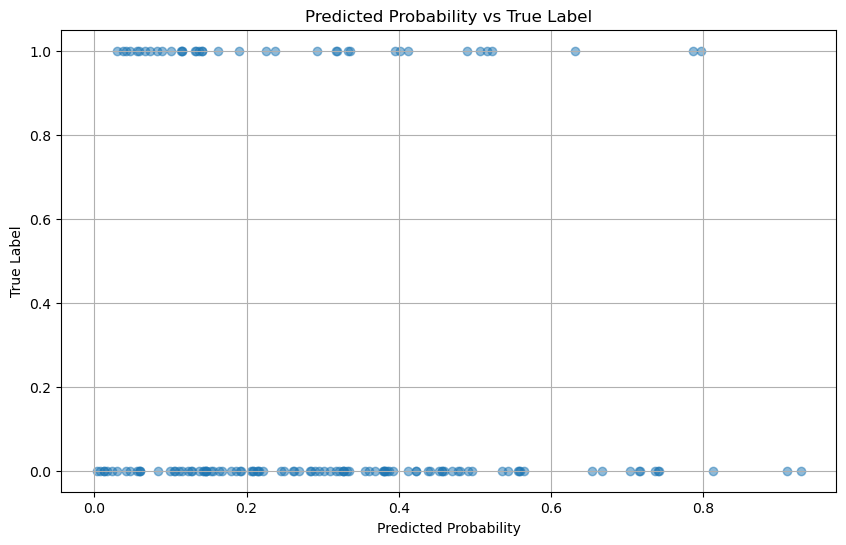

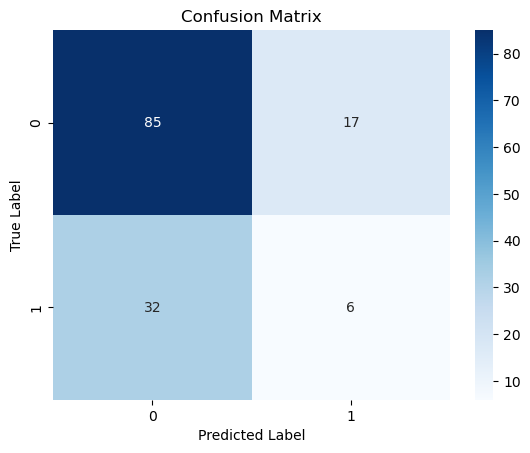

<Figure size 1000x600 with 0 Axes>

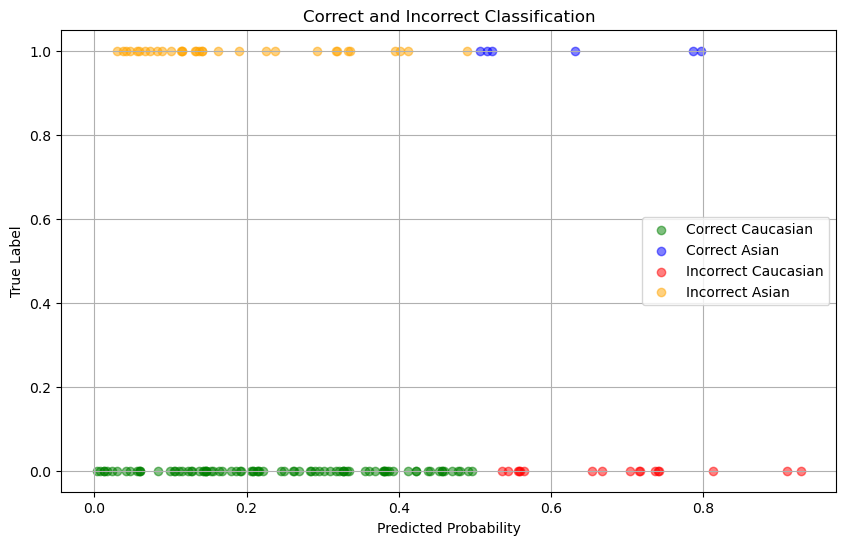

In [28]:
#using pre-trained VGG16 model on unbalanced dataset
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam as AdamLegacy
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess data
def preprocess_data(images, labels):
    # Normalization
    images = images.astype('float32') / 255.0

    return images, labels

# Function to fetch jpg files from subfolders
def fetch_jpgs_from_subfolders(parent_directory, max_caucasian_images=500, max_asian_images=200):
    caucasian_jpg_files_dict = {}
    asian_jpg_files_dict = {}

    # Use glob to search for jpg files recursively
    jpg_files = glob.glob(os.path.join(parent_directory, '**/*.jpg'), recursive=True)

    # Randomly select max_caucasian_images number of Caucasian files
    caucasian_jpg_files = np.random.choice([jpg_file for jpg_file in jpg_files if 'caucasian' in jpg_file], 
                                           size=min(max_caucasian_images, len(jpg_files)), replace=False)
    # Randomly select max_asian_images number of Asian files
    asian_jpg_files = np.random.choice([jpg_file for jpg_file in jpg_files if 'asian' in jpg_file], 
                                        size=min(max_asian_images, len(jpg_files)), replace=False)

    # Fetch Caucasian images
    for jpg_file in caucasian_jpg_files:
        folder, filename = os.path.split(jpg_file)
        ethnicity = os.path.basename(os.path.dirname(folder))
        img = cv2.imread(jpg_file)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize image to the input size of VGG16
            if ethnicity not in caucasian_jpg_files_dict:
                caucasian_jpg_files_dict[ethnicity] = []
            caucasian_jpg_files_dict[ethnicity].append(img)

    # Fetch Asian images
    for jpg_file in asian_jpg_files:
        folder, filename = os.path.split(jpg_file)
        ethnicity = os.path.basename(os.path.dirname(folder))
        img = cv2.imread(jpg_file)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize image to the input size of VGG16
            if ethnicity not in asian_jpg_files_dict:
                asian_jpg_files_dict[ethnicity] = []
            asian_jpg_files_dict[ethnicity].append(img)

    return caucasian_jpg_files_dict, asian_jpg_files_dict

# CUSTOM PATH 
parent_directory_caucasian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/caucasian'
parent_directory_asian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/asian'


# Fetch JPG files from subfolders for Caucasian and Asian datasets
caucasian_jpg_files_dict, asian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_caucasian, max_caucasian_images=500, max_asian_images=200)

# Load images and labels for Caucasian dataset
X_caucasian = []
y_caucasian = []
for ethnicity, images in caucasian_jpg_files_dict.items():
    for image in images:
        X_caucasian.append(image)
        y_caucasian.append(0)  # 0 represents 'Caucasian'

# Load images and labels for Asian dataset
X_asian = []
y_asian = []
for ethnicity, images in asian_jpg_files_dict.items():
    for image in images:
        X_asian.append(image)
        y_asian.append(1)  # 1 represents 'Asian'

# Convert lists to numpy arrays
X_caucasian = np.array(X_caucasian)
y_caucasian = np.array(y_caucasian)
X_asian = np.array(X_asian)
y_asian = np.array(y_asian)

# Combine Caucasian and Asian datasets with corresponding labels
X = np.concatenate((X_caucasian, X_asian), axis=0)
y = np.concatenate((y_caucasian, y_asian), axis=0)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocess data
X_train, y_train = preprocess_data(X_train, y_train)
X_val, y_val = preprocess_data(X_val, y_val)
X_test, y_test = preprocess_data(X_test, y_test)

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the pre-trained VGG16 model
model.add(vgg_model)

# Add custom layers on top of the pre-trained VGG16 model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=AdamLegacy(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions on test set
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probs, y_test, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Predicted Probability vs True Label')
plt.grid(True)
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot with ground truth labels and differentiation between correct and incorrect predictions
plt.figure(figsize=(10, 6))

# Plot correctly and incorrectly classified samples
plt.figure(figsize=(10, 6))

# Plot correctly classified samples
correct_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 0)]
correct_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 1)]
plt.scatter(correct_caucasian_probs, np.zeros_like(correct_caucasian_probs), alpha=0.5, color='green', label='Correct Caucasian')
plt.scatter(correct_asian_probs, np.ones_like(correct_asian_probs), alpha=0.5, color='blue', label='Correct Asian')

# Plot incorrectly classified samples
incorrect_caucasian_probs = y_pred_probs[(y_test.squeeze() == 0) & (y_pred.squeeze() == 1)]
incorrect_asian_probs = y_pred_probs[(y_test.squeeze() == 1) & (y_pred.squeeze() == 0)]
plt.scatter(incorrect_caucasian_probs, np.zeros_like(incorrect_caucasian_probs), alpha=0.5, color='red', label='Incorrect Caucasian')
plt.scatter(incorrect_asian_probs, np.ones_like(incorrect_asian_probs), alpha=0.5, color='orange', label='Incorrect Asian')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Correct and Incorrect Classification')
plt.legend()
plt.grid(True)
plt.show()


16/16 [==============================] - 29s 2s/step
Image 1: Person Daniel Craig_M (Caucasian)
Image 2: Person Daniel Craig_M (Caucasian)
Image 3: Person Daniel Craig_M (Caucasian)
Image 4: Person Daniel Craig_M (Caucasian)
Image 5: Person Daniel Craig_M (Caucasian)
Image 6: Person Daniel Craig_M (Caucasian)
Image 7: Person Daniel Craig_M (Caucasian)
Image 8: Person Daniel Craig_M (Caucasian)
Image 9: Person Daniel Craig_M (Caucasian)
Image 10: Person Daniel Craig_M (Caucasian)
Image 11: Person Daniel Craig_M (Caucasian)
Image 12: Person Daniel Craig_M (Caucasian)
Image 13: Person Daniel Craig_M (Caucasian)
Image 14: Person Daniel Craig_M (Caucasian)
Image 15: Person Daniel Craig_M (Caucasian)
Image 16: Person Daniel Craig_M (Caucasian)
Image 17: Person Daniel Craig_M (Caucasian)
Image 18: Person Daniel Craig_M (Caucasian)
Image 19: Person Daniel Craig_M (Caucasian)
Image 20: Person Daniel Craig_M (Caucasian)
Image 21: Person Daniel Craig_M (Caucasian)
Image 22: Person Daniel Craig_M 

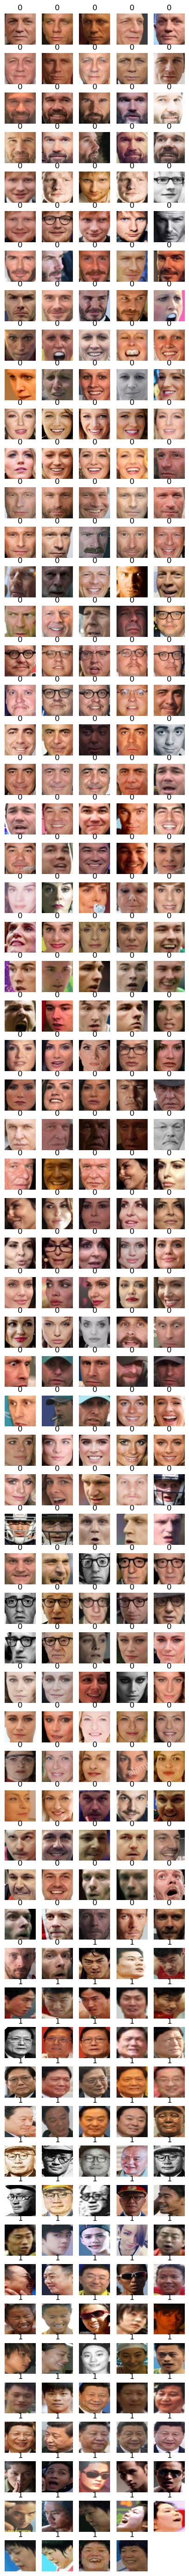

Cluster 1
Cluster labels shape: (500,)
Labels shape: (500,)


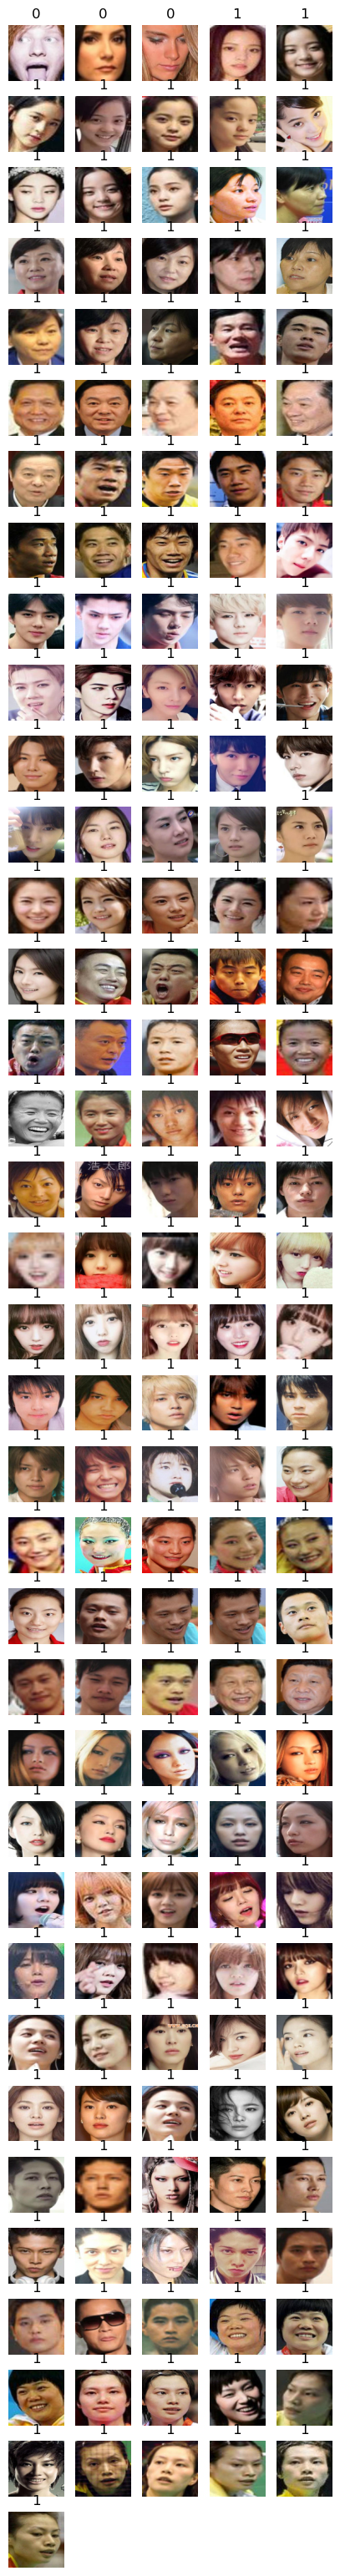

Accuracy: 0.84
Recall: 0.692
Precision: 0.9829545454545454
F1 Score: 0.812206572769953
Silhouette Score: 0.10280136


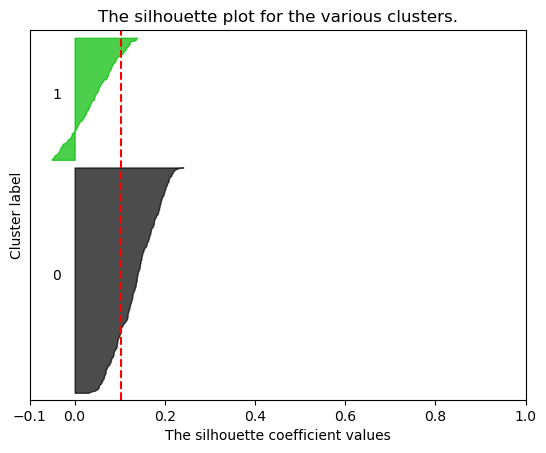

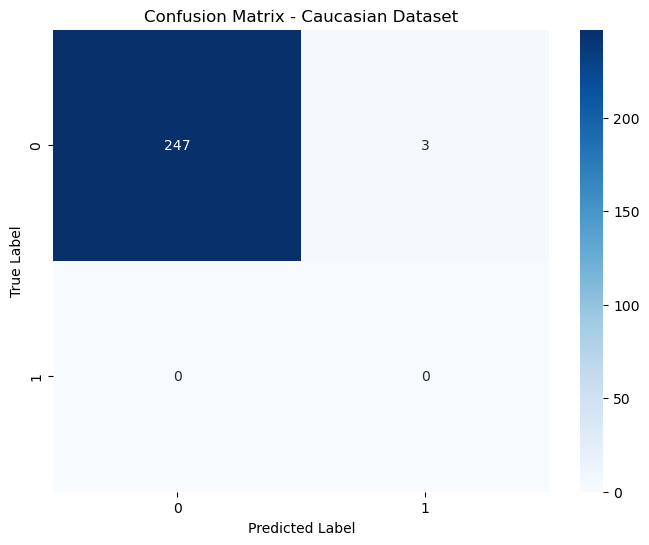

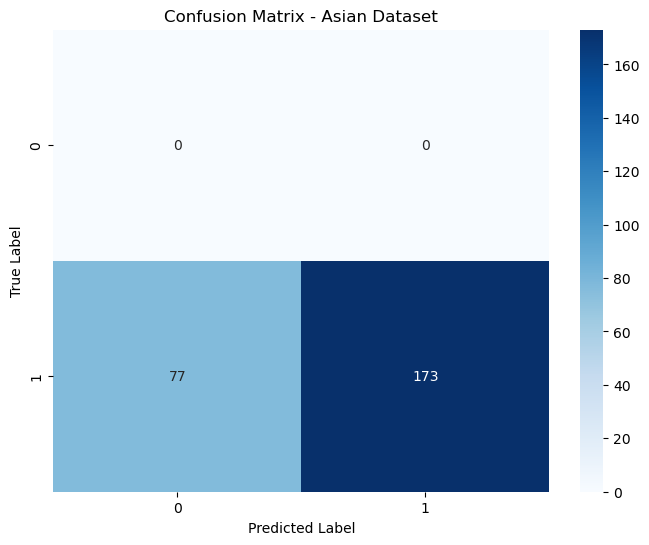

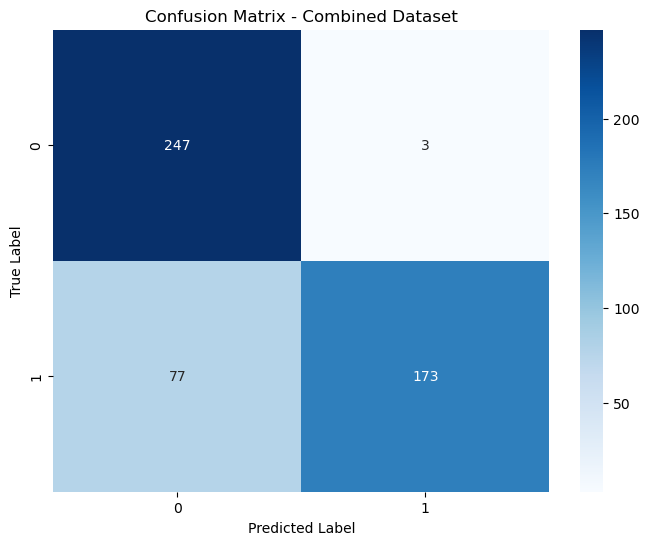

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from keras.applications import VGG16
import glob
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from keras.applications.vgg16 import preprocess_input
import seaborn as sns

# Function to evaluate clustering performance
def evaluate_clustering(labels_true, labels_pred):
    accuracy = accuracy_score(labels_true, labels_pred)
    recall = recall_score(labels_true, labels_pred)
    precision = precision_score(labels_true, labels_pred)
    f1 = f1_score(labels_true, labels_pred)
    return accuracy, recall, precision, f1

# Function to load images from subfolders and label them based on subfolder names
def load_images_and_labels(directory):
    images = []
    labels = []
    label_to_index = {}
    index = 0
    for subfolder in sorted(os.listdir(directory)):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                filepath = os.path.join(subfolder_path, filename)
                image = cv2.imread(filepath)
                if image is not None:
                    images.append(image)
                    labels.append(index)
            label_to_index[subfolder] = index
            index += 1
    return np.array(images), np.array(labels), label_to_index

# Function to preprocess images
def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        # Resize image to a fixed size (e.g., 100x100)
        resized_image = cv2.resize(image, (100, 100))
        # Normalize pixel values to the range [-1, 1] for VGG16
        normalized_image = resized_image.astype('float32')
        preprocessed_images.append(normalized_image)
    return np.array(preprocessed_images)

# Function to extract features from images using a pre-trained CNN model
def extract_features(images):
    # Load pre-trained VGG16 model
    model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    # Preprocess input images for VGG16 model
    preprocessed_images = preprocess_input(images)
    # Extract features from preprocessed images using VGG16 model
    features = model.predict(preprocessed_images)
    return features.reshape(len(features), -1)  # Flatten features

# Function to cluster the extracted features
def cluster_features(features, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    return cluster_labels

# Function to fetch jpg files from subfolders with a limit of 10 images per subfolder
def fetch_jpgs_from_subfolders(parent_directory, max_images_per_subfolder=10):
    jpg_files_dict = {}  # Dictionary to store the result

    # Use glob to search for jpg files recursively
    jpg_files = glob.glob(os.path.join(parent_directory, '**/*.jpg'), recursive=True)

    # Iterate through the jpg files
    for jpg_file in jpg_files:
        folder, filename = os.path.split(jpg_file)
        ethnicity = os.path.basename(os.path.dirname(folder))
        img = cv2.imread(jpg_file)
        if img is not None:
            img = cv2.resize(img, (100, 100))  # Resize image to a fixed size
            if ethnicity not in jpg_files_dict:
                jpg_files_dict[ethnicity] = []
            if len(jpg_files_dict[ethnicity]) < max_images_per_subfolder:
                jpg_files_dict[ethnicity].append(img)
    return jpg_files_dict

# Function to display faces from each cluster
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 100, 100, 3)  # Reshape faces to original dimensions
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.axis("off")
        plt.title(label)
    plt.show()

# Main function
def main():

    # Directories containing subfolders with images
    parent_directory_caucasian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/caucasian'
    parent_directory_asian = '/Users/elizabethamponsah/Documents/Documents - Elizabeth’s MacBook Pro/Dissertation/dataset (less)/asian'

    # Fetch JPG files from subfolders for Caucasian dataset (limiting to 10 images per subfolder)
    caucasian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_caucasian, max_images_per_subfolder=10)

    # Fetch JPG files from subfolders for Asian dataset (limiting to 10 images per subfolder)
    asian_jpg_files_dict = fetch_jpgs_from_subfolders(parent_directory_asian, max_images_per_subfolder=10)

    # Combine images and labels for both datasets
    images_caucasian = np.concatenate([np.array(images) for images in caucasian_jpg_files_dict.values()])
    images_asian = np.concatenate([np.array(images) for images in asian_jpg_files_dict.values()])

    # Concatenate labels for both datasets
    labels_caucasian = np.zeros(len(images_caucasian), dtype=int)  # Assign label 0 for Caucasian
    labels_asian = np.ones(len(images_asian), dtype=int)  # Assign label 1 for Asian

    # Combine images and labels
    images = np.concatenate((images_caucasian, images_asian))
    labels = np.concatenate((labels_caucasian, labels_asian))

    # Preprocess images
    preprocessed_images = preprocess_images(images)

    # Extract features
    features = extract_features(preprocessed_images)

    # Number of clusters
    num_clusters = 2

    # Cluster the features
    cluster_labels = cluster_features(features, num_clusters)

    # Print the clustering results
    label_to_index_caucasian = {ethnicity: index for index, ethnicity in enumerate(caucasian_jpg_files_dict.keys())}
    label_to_index_asian = {ethnicity: index + len(caucasian_jpg_files_dict) for index, ethnicity in enumerate(asian_jpg_files_dict.keys())}

    for i, label in enumerate(cluster_labels):
        if i < len(labels_caucasian):
            person = [k for k, v in label_to_index_caucasian.items() if v == label]
            if person:
                print(f"Image {i+1}: Person {person[0]} (Caucasian)")
            else:
                print(f"Image {i+1}: Unknown person (Caucasian)")
        else:
            person = [k for k, v in label_to_index_asian.items() if v == label]
            if person:
                print(f"Image {i+1}: Person {person[0]} (Asian)")
            else:
                print(f"Image {i+1}: Unknown person (Asian)")

    # Display sample faces from each cluster
    for cluster_id in np.unique(cluster_labels):
        print("Cluster", cluster_id)
        in_cluster = cluster_labels == cluster_id  # Boolean index for elements in current cluster
        print("Cluster labels shape:", cluster_labels.shape)
        print("Labels shape:", labels.shape)
        cluster_faces = images[in_cluster]  # Extract faces belonging to current cluster
        cluster_labels_subset = labels[in_cluster]  # Extract corresponding labels
        plot_faces(cluster_faces, cluster_labels_subset)

    # Evaluate clustering performance
    accuracy, recall, precision, f1 = evaluate_clustering(labels, cluster_labels)
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

    # Compute silhouette score
    silhouette_avg = silhouette_score(features, cluster_labels)
    print("Silhouette Score:", silhouette_avg)

    # Create synthetic data (blobs) for silhouette plot visualization
    X, y = make_blobs(n_samples=len(features), n_features=2, centers=num_clusters, cluster_std=1.0)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    # Create a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)

    # The silhouette plot displays a silhouette coefficient for each sample.
    # The vertical line for average silhouette score of all the values
    ax1.set_xlim([-0.1, 1])
    # The (num_clusters+1)*10 is for padding between silhouette plots of individual clusters, to seperate them clearly.
    ax1.set_ylim([0, len(features) + (num_clusters + 1) * 10])

    y_lower = 10
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

    # Compute confusion matrix for Caucasian dataset
    conf_matrix_caucasian = confusion_matrix(labels_caucasian, cluster_labels[:len(labels_caucasian)])

    # Compute confusion matrix for Asian dataset
    conf_matrix_asian = confusion_matrix(labels_asian, cluster_labels[len(labels_caucasian):])

    # Combine labels and cluster labels for both datasets
    combined_labels = np.concatenate((labels_caucasian, labels_asian))
    combined_cluster_labels = np.concatenate((cluster_labels[:len(labels_caucasian)], cluster_labels[len(labels_caucasian):]))

    # Compute confusion matrix for combined dataset
    conf_matrix_combined = confusion_matrix(combined_labels, combined_cluster_labels)

    # Plot confusion matrix for Caucasian dataset
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_caucasian, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - Caucasian Dataset')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot confusion matrix for Asian dataset
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_asian, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - Asian Dataset')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot confusion matrix for combined dataset
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_combined, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - Combined Dataset')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

if __name__ == "__main__":
    main()
